Creating a Intrusion based detection system using the NSL KDD dataset.

Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading the file

In [3]:
df = pd.read_csv("KDDTrain+.txt")
df.head(6)


,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21


Since the names of the features is not given I am taking it from the NSL-KDD exploration database (https://www.kaggle.com/code/timgoodfellow/nsl-kdd-explorations)

In [4]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df.columns = columns

Checking the names of the coloums again 

In [5]:
df.head(6)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21


Getting an idea of the database 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In the attack column, the normal values are the which are the 'good/valid' network inputs, rest are the intrusions for which I need to train the model.
I will try to identify which parameters can help us find out if an input is an intrusion or a normal entry by checking the attack and the  coloumns of features that have a string value one by one 

In [7]:
attack_n = []
for i in df.attack:
    if i == 'normal':
        attack_n.append("normal")
    else:
        attack_n.append("intrusion")
df['attack'] = attack_n    

Check wheather all values have been converted to normal/intrusion

In [8]:
df['attack'].unique()

array(['normal', 'intrusion'], dtype=object)

First I am checking for protocol types(rules that say how computers talk to each other)
Types - udp(User Datagram Protocol), tcp(Transmission Control Protocol) and icmp(Internet Control Message Protocol)

Finding how intrusions vary among different protocols. 

Plotting code copied from kaggle

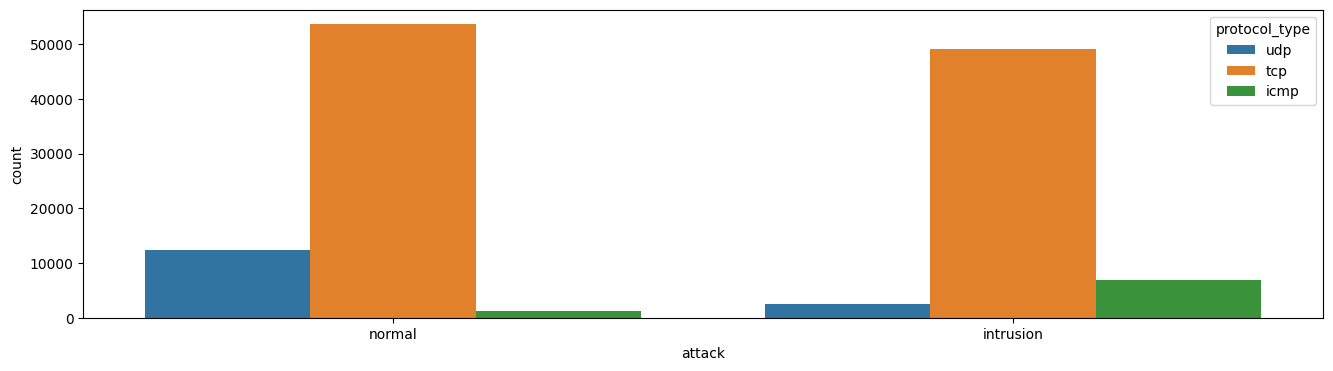

In [9]:
plt.figure(figsize=(16,4))
sns.countplot(x='attack',data=df,hue='protocol_type')
plt.show()

Most of the attacks are from tcp protocols, but ratio wise icmp has more intrusions than normal inputs

After protocol I am checking for service, I have copied the code for plotting 'service' from kaggle. 

C:\Users\sanja\AppData\Local\Temp\ipykernel_12052\3627339191.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right") #helps to prevent overlapping


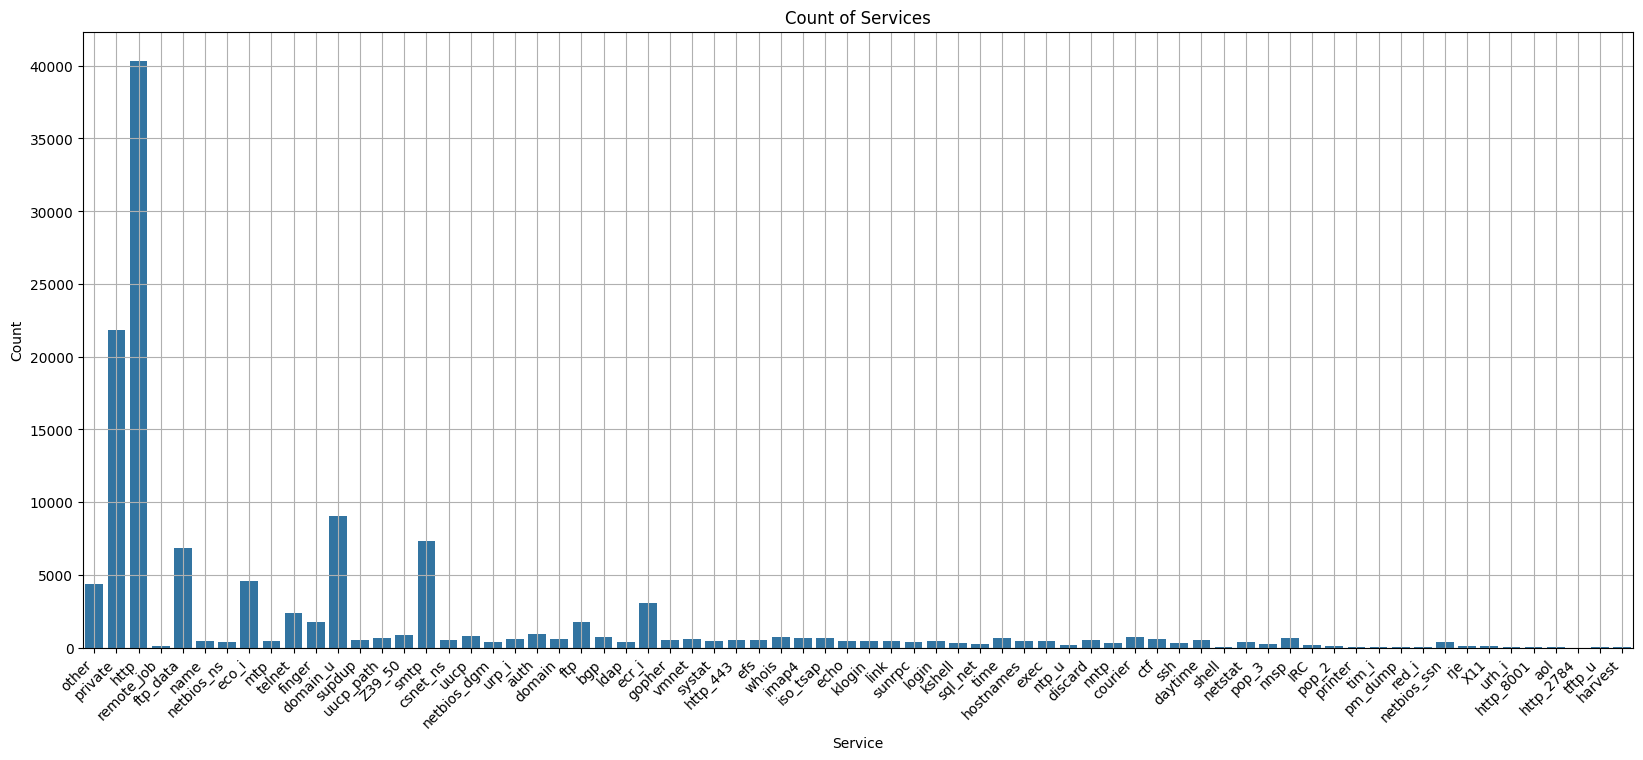

In [10]:
plt.figure(figsize=(20, 8))  # Adjusted figure size
ax = sns.countplot(x='service', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right") #helps to prevent overlapping
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Count of Services')
plt.grid(True)
plt.show()

C:\Users\sanja\AppData\Local\Temp\ipykernel_12052\3813966679.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotated labels


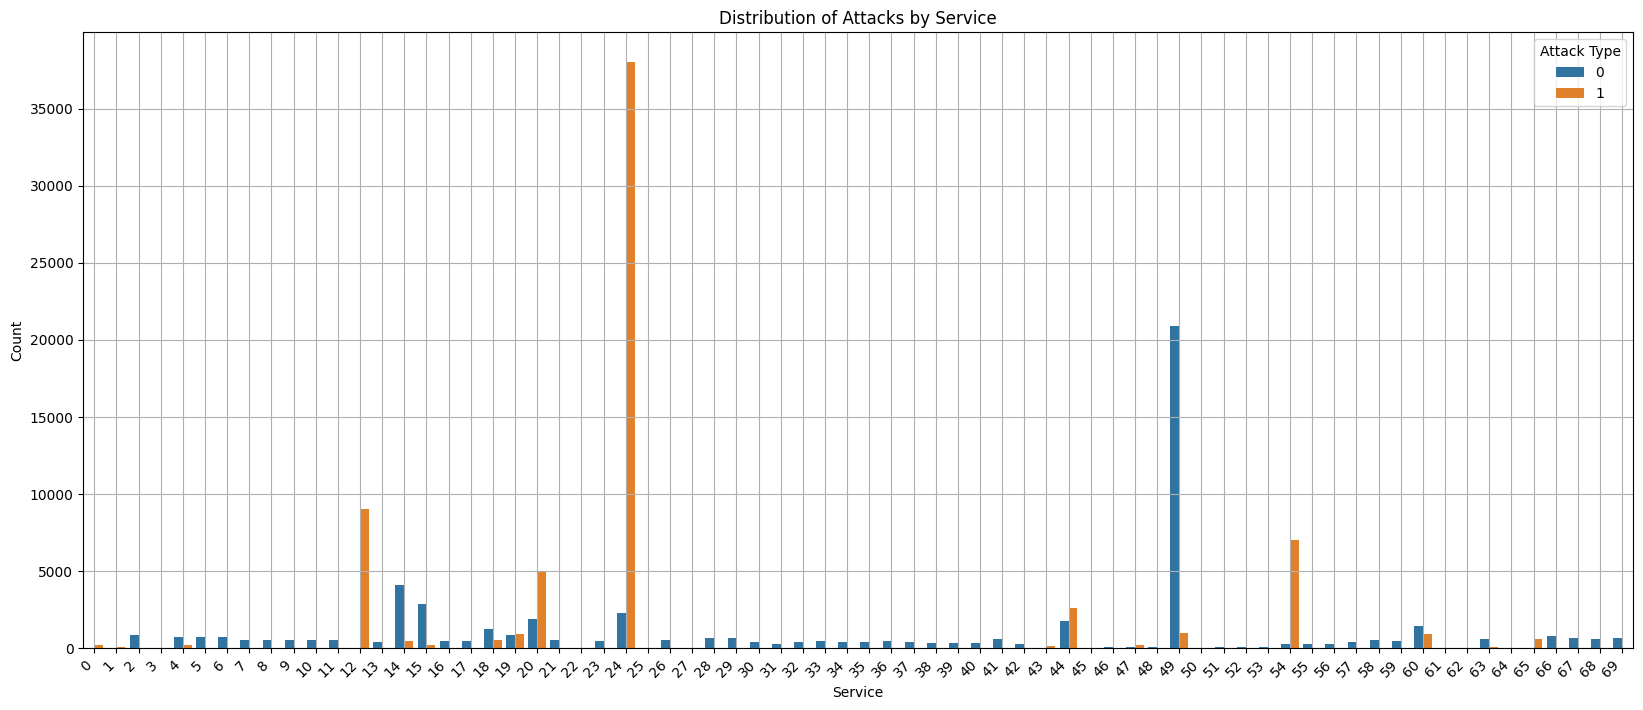

In [42]:
plt.figure(figsize=(20, 8))  # Adjusted figure size
ax = sns.countplot(x='service', hue='attack', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotated labels
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Distribution of Attacks by Service')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()

--> private service is most used for attacks

Next I will find for flags. (In networking, a flag is a small control indicator in a packet or connection that tells you what’s happening with the communication.
SF → Normal connection, finished correctly

S0 → Connection attempt, no response

REJ → Connection rejected

RSTO → Reset by originator

RSTR → Reset by responder)

C:\Users\sanja\AppData\Local\Temp\ipykernel_12052\1087274995.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(


<Figure size 1200x800 with 0 Axes>

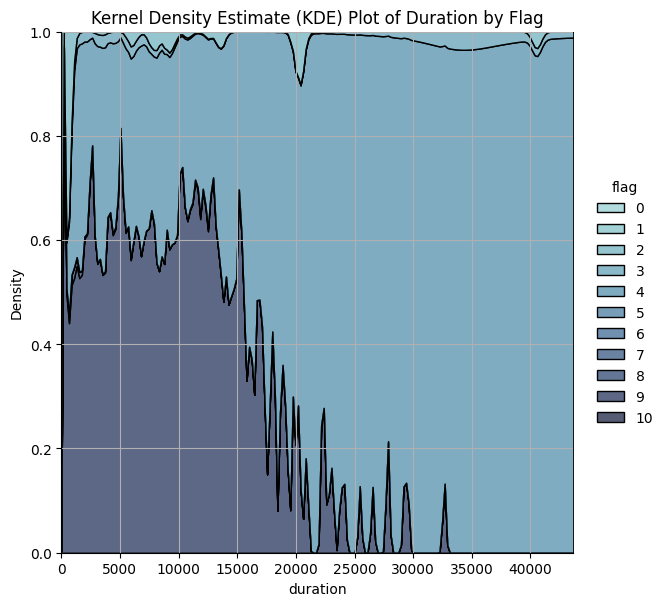

In [43]:
plt.figure(figsize=(12, 8))
sns.displot(
    data=df,
    x="duration",
    hue="flag",
    kind="kde",
    height=6,
    multiple="fill",
    clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)
plt.title('Kernel Density Estimate (KDE) Plot of Duration by Flag')
plt.grid(True)
plt.show()

Check which types of logins are used for attacks


Plotting code copied from kaggle

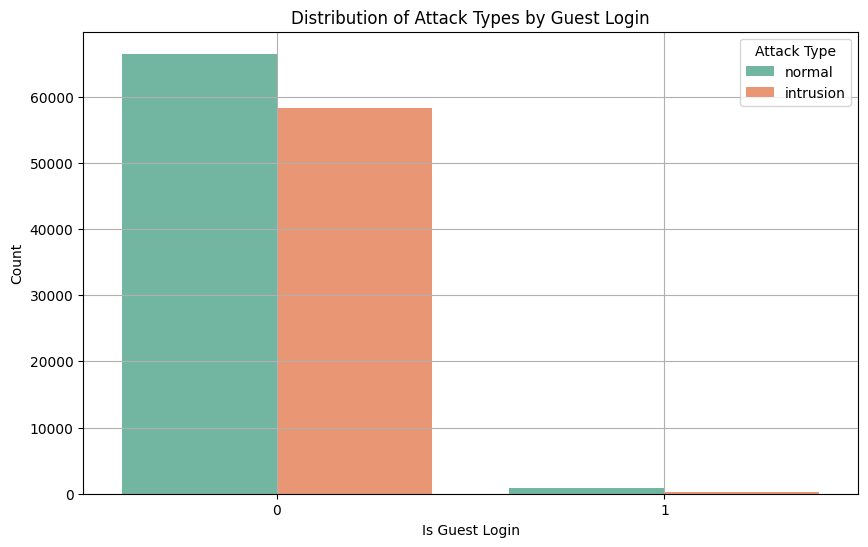

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='is_guest_login', hue='attack', data=df, palette='Set2')
plt.xlabel('Is Guest Login')
plt.ylabel('Count')
plt.title('Distribution of Attack Types by Guest Login')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()

So, the attacks are occuring when the guest is not looged in

Since for training the model I am only using the columns which have a string value, let's take those coloumns seperately

In [14]:
cat_features = df.select_dtypes(include='object').columns
cat_features

Index(['protocol_type', 'service', 'flag', 'attack'], dtype='object')

Since these features have multiple values, encoding is needed

In [44]:
from sklearn import preprocessing
pp = preprocessing.LabelEncoder()
clm = ['protocol_type', 'service', 'flag', 'attack']
for i in clm:
    df[i] = pp.fit_transform(df[i])

Building a logistic regression model

In [45]:
from sklearn.model_selection import train_test_split

X = df.drop(["attack"], axis=1)
y = df["attack"]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1,random_state=43) 

In [17]:
train_index = X_train.columns
train_index

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'level'],
      dtype='object')

In [18]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = train_index
mutual_info.sort_values(ascending=False)

src_bytes                      0.566438
service                        0.468777
dst_bytes                      0.440519
flag                           0.368687
same_srv_rate                  0.366087
diff_srv_rate                  0.360351
dst_host_srv_count             0.334937
dst_host_same_srv_rate         0.311127
logged_in                      0.291564
dst_host_serror_rate           0.287040
dst_host_diff_srv_rate         0.284145
dst_host_srv_serror_rate       0.281808
serror_rate                    0.278501
srv_serror_rate                0.269079
count                          0.263057
dst_host_srv_diff_host_rate    0.189396
level                          0.152033
dst_host_count                 0.141217
dst_host_same_src_port_rate    0.129807
srv_diff_host_rate             0.098816
srv_count                      0.065263
dst_host_srv_rerror_rate       0.061707
protocol_type                  0.052704
rerror_rate                    0.042717
dst_host_rerror_rate           0.036997


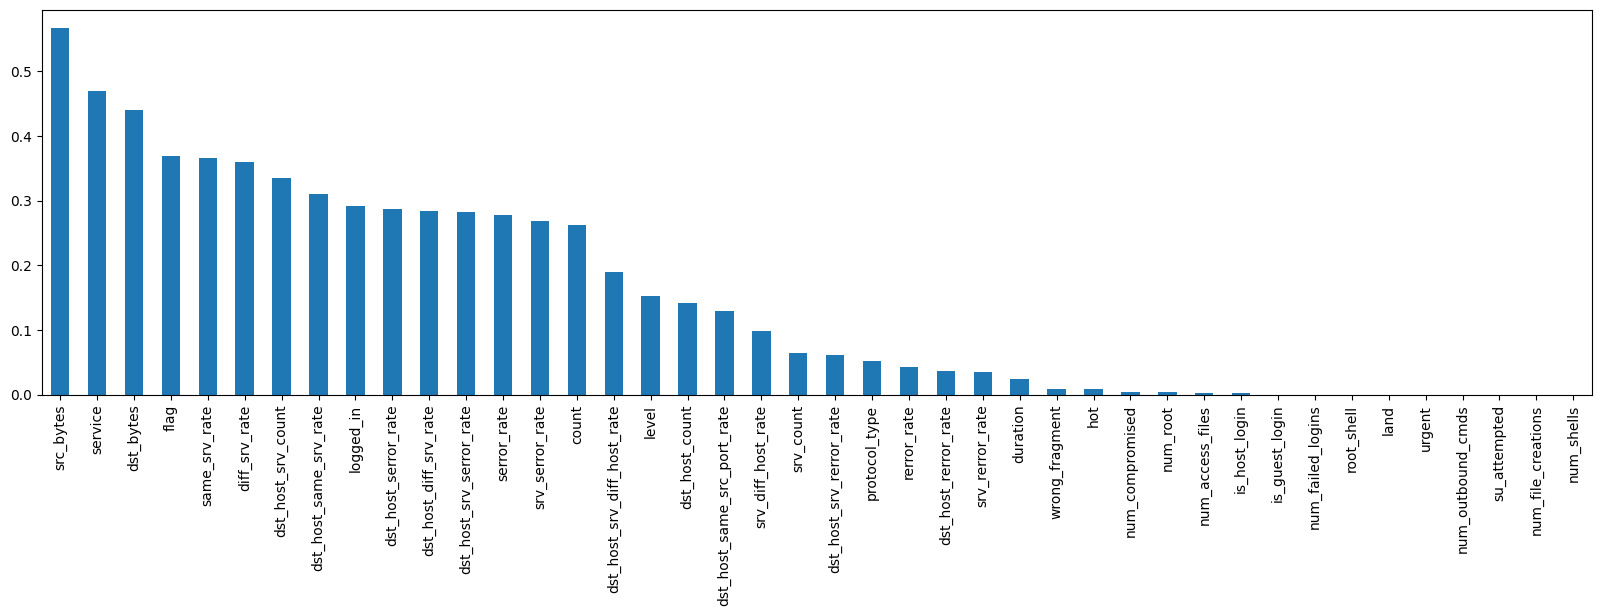

In [19]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 5));

In [20]:
from sklearn.feature_selection import SelectKBest
Select_features = SelectKBest(mutual_info_classif, k=30)
Select_features.fit(X_train, y_train)
train_index[Select_features.get_support()]

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'hot', 'logged_in', 'num_root', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'level'],
      dtype='object')

In [21]:
columns=['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'hot', 'logged_in', 'num_compromised',
       'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate']

#We will continue our model with top 15 features, because dataset is big enough

X_train=X_train[columns]
X_test=X_test[columns]

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
Logistic_model = LogisticRegression(random_state=42)
Logistic = Logistic_model.fit(X_train,y_train)

In [30]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [31]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [32]:
eval_metric(Logistic_model, X_train, y_train, X_test, y_test)

Test_Set
[[5421  407]
 [ 233 6537]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      5828
           1       0.94      0.97      0.95      6770

    accuracy                           0.95     12598
   macro avg       0.95      0.95      0.95     12598
weighted avg       0.95      0.95      0.95     12598


Train_Set
[[49316  3486]
 [ 2140 58432]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.95     52802
           1       0.94      0.96      0.95     60572

    accuracy                           0.95    113374
   macro avg       0.95      0.95      0.95    113374
weighted avg       0.95      0.95      0.95    113374



Since the decision boundary cannot be built with 15 features I am plotting for the top 2 features. 

In [33]:
y_train = y_train.values
y_test = y_test.values

In [34]:
def add_bias(X):
    ones = np.ones((X.shape[0], 1))
    return np.hstack((ones, X))

X_train_b = add_bias(X_train)
X_test_b = add_bias(X_test)

In [35]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [36]:
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    
    epsilon = 1e-5  # avoid log(0)
    
    cost = -(1/m) * np.sum(
        y * np.log(h + epsilon) + 
        (1 - y) * np.log(1 - h + epsilon)
    )
    
    return cost


In [37]:
def gradient_descent(X, y, theta, lr, iterations):
    m = len(y)
    cost_history = []
    
    for i in range(iterations):
        
        h = sigmoid(X @ theta)
        
        gradient = (1/m) * (X.T @ (h - y))
        
        theta = theta - lr * gradient
        
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
        
        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost}")
    
    return theta, cost_history


In [38]:
n_features = X_train_b.shape[1]
theta = np.zeros(n_features)

learning_rate = 0.01
iterations = 1000

theta, cost_history = gradient_descent(
    X_train_b, y_train, theta,
    learning_rate,
    iterations
)


Iteration 0, Cost: 0.687406362255183
Iteration 100, Cost: 0.39611620064331393
Iteration 200, Cost: 0.31056471449310147
Iteration 300, Cost: 0.2730214695541144
Iteration 400, Cost: 0.2523019139402479
Iteration 500, Cost: 0.239201102881647
Iteration 600, Cost: 0.23016660935024216
Iteration 700, Cost: 0.22356098164461657
Iteration 800, Cost: 0.2185276600690312
Iteration 900, Cost: 0.21457383734895022


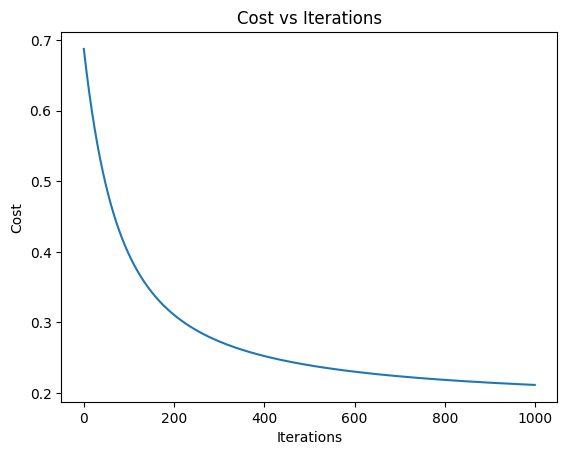

In [39]:
import matplotlib.pyplot as plt

plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations")
plt.show()


In [40]:
def predict(X, theta, threshold=0.5):
    probabilities = sigmoid(X @ theta)
    return (probabilities >= threshold).astype(int)


In [41]:
y_train_pred = predict(X_train_b, theta)
y_test_pred = predict(X_test_b, theta)

from sklearn.metrics import classification_report

print("Train Set")
print(classification_report(y_train, y_train_pred))

print("Test Set")
print(classification_report(y_test, y_test_pred))


Train Set
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     52802
           1       0.94      0.93      0.94     60572

    accuracy                           0.93    113374
   macro avg       0.93      0.93      0.93    113374
weighted avg       0.93      0.93      0.93    113374

Test Set
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      5828
           1       0.94      0.93      0.93      6770

    accuracy                           0.93     12598
   macro avg       0.93      0.93      0.93     12598
weighted avg       0.93      0.93      0.93     12598

